# Utilities

## Imports

In [28]:
#pip install pandas
#pip install numpy
#pip install -U scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

## Methods

### Euclidean distance

In [29]:
def distancia_euclidea(x, y):
    return np.sqrt(np.sum((x - y)**2))


##### Next method paints all neighbors whose  distance is the same to A and B. Such distance is calculated  by using each point as a center of a circumference and the euclidean distance among them as the radius.

In [30]:
def visualizar_distancia(punto_a, punto_b, ver_radio = False):
    
    # Pintar los dos puntos
    plt.scatter(*punto_a, c='red', marker='o', label='A')
    plt.scatter(*punto_b, c='blue', marker='o', label='B')

    # Dibujar una línea entre los puntos
    plt.plot([punto_a[0], punto_b[0]], [punto_a[1], punto_b[1]], linestyle='--', color='gray')

    # Calcular la distancia euclídea
    distance = distancia_euclidea(punto_a, punto_b)

    # Calcular el ángulo de rotación de la línea para escribir el texto
    angle = np.arctan2((punto_b[1] - punto_a[1]), (punto_b[0] - punto_a[0])) * (180 / np.pi) 

    # Calcular el centro de la línea para escribir el texto
    midpoint = [(punto_a[0] + punto_b[0]) / 2, (punto_a[1] + punto_b[1]) / 2] 

    # Escribir la distancia entre los dos puntos
    plt.text(midpoint[0], midpoint[1], f'Distancia: {distance:.2f}', ha='center', va='bottom', rotation=angle)

    if ver_radio:

        # Añadir círculos con la distancia euclídea
        circle = plt.Circle(punto_a, # centro
                            distance, # radio
                            fill=False, linestyle='dotted', edgecolor='red')
        plt.gca().add_patch(circle)
        circle = plt.Circle(punto_b, # centro
                            distance, # radio
                            fill=False, linestyle='dotted', edgecolor='blue')
        plt.gca().add_patch(circle)

    plt.title('Distancia euclídea')
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    
    plt.xlim(0,1) # rango eje x
    plt.ylim(0,1) # rango eje y
    
    # Hacer los ejes en la misma magnitud
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Sacar la leyenda de la caja principal
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

# visualizar_distancia(punto_a, punto_b)
# visualizar_distancia(punto_a, punto_b, ver_radio = True)



### Next method shows the k nearest neighbors only.

In [31]:

# Counter proporciona un diccionario donde cada elemento distinto se almacena 
# como claves con un valor asociado igual a su cuenta
from collections import Counter

def visualizar_vecinos(X_train, y_train, dato_nuevo, indices_vecinos, clase):

    # Mostrar conjunto de entrenamiento
    plt.scatter(X_train[:, 0], 
                X_train[:, 1],
                c=y_train, 
                edgecolors='k', marker='o', s=100, label='Training')

    # Resaltar los vecinos más cercanos del punto
    plt.scatter(X_train[indices_vecinos, 0], 
                X_train[indices_vecinos, 1], 
                facecolors='none', 
                edgecolors='red', # rodear en rojo
                linewidths=2, 
                s=100, 
                label='Vecinos más cercanos')

    # Mostrar el nuevo dato que queremos clasficar
    plt.scatter(dato_nuevo[0], 
                dato_nuevo[1], 
                c=clase, 
                vmin=0, vmax=1,
                marker='x', s=200, label='Test Point')

    plt.title('Vecinos más cercanos de {}'.format(np.round(dato_nuevo, 2)))
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

# Recibe un conjunto de datos de entrenamiento junto con sus etiquetas reales, el nuevo dato que queremos clasificar y el número de vecinos que seleccionamos para hacerlo
def clasificar_dato_usando_knn(X_train, y_train, dato_nuevo, k=3):

    # Obtener todas las distancias
    distances = [distancia_euclidea(dato_nuevo, x_train) for x_train in X_train]

    # Seleccionar los objetos k más cercanos
    k_indices = np.argsort(distances)[:k]

    # Asignar las etiquetas
    k_nearest_labels = [y_train[i] for i in k_indices]

    # Seleccionar la clase a la que se asigna, 
    # que es la etiqueta más común entre los vecinos más cercanos
    most_common = Counter(k_nearest_labels).most_common(1)

    # Visualizar la iteración
    visualizar_vecinos(X_train, y_train, dato_nuevo, k_indices, most_common[0][0])

    # Devolver la clase
    return most_common[0][0]

# Realizamos la clasificación para todos los datos del conjunto de test
def aplicar_kNN_datos_nuevos(X_test, X_train, y_train, k=3):
    
    # Crear un array inicialmente vacío para almacenar las classes en cada iteración
    predicted_labels = np.empty(X_test.shape[0], dtype=int)

    # Clasficar cada punto del conjunto de test
    for i, x_test in enumerate(X_test):
        predicted_labels[i] = clasificar_dato_usando_knn(X_train, y_train, x_test, k)

    # Almacenar para cada objeto la clase que se le ha asignado
    df = pd.DataFrame(X_test)
    df['pred_class'] = predicted_labels

    return df


# K NEAREST NEIGHBORS ALGORITHM

### Using pandas


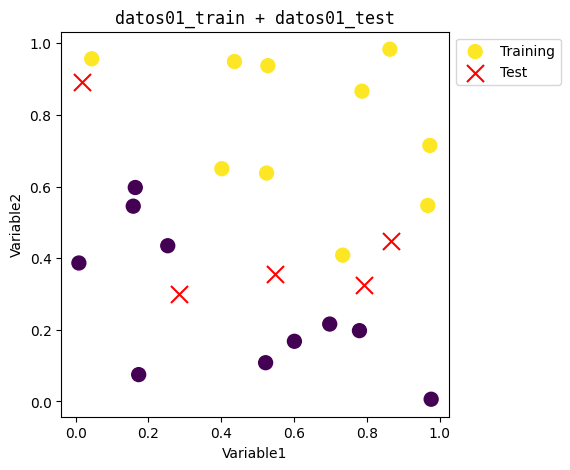

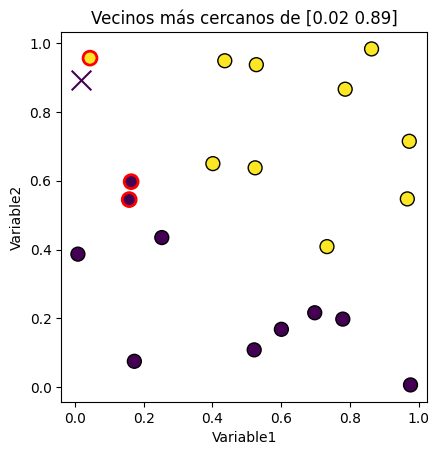

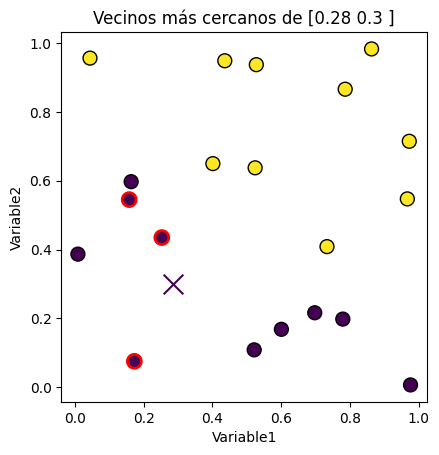

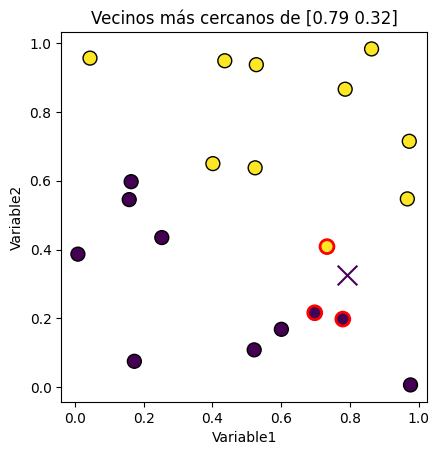

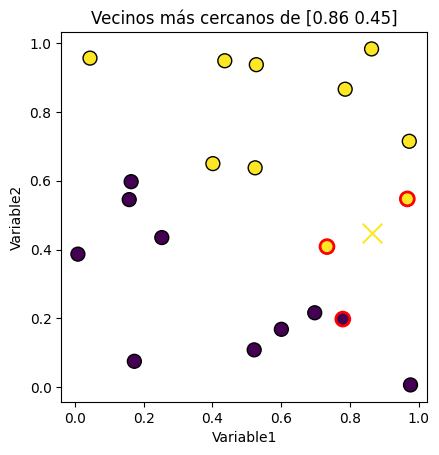

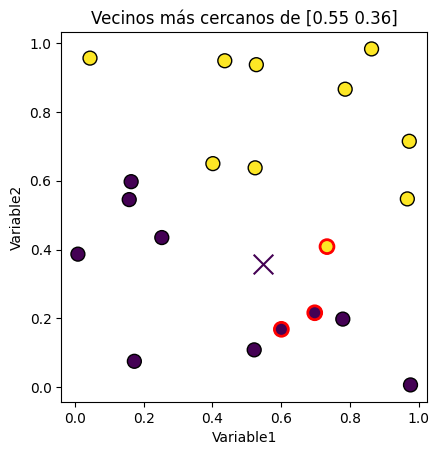

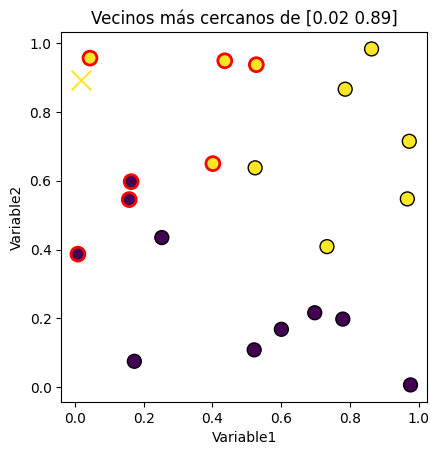

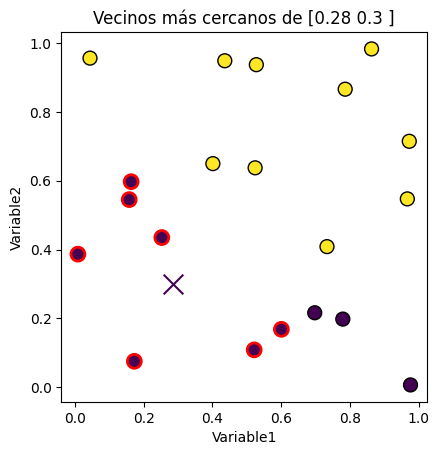

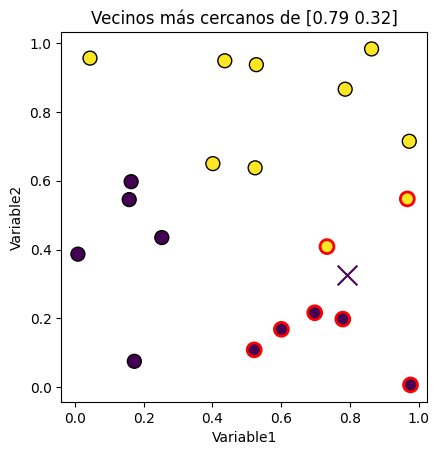

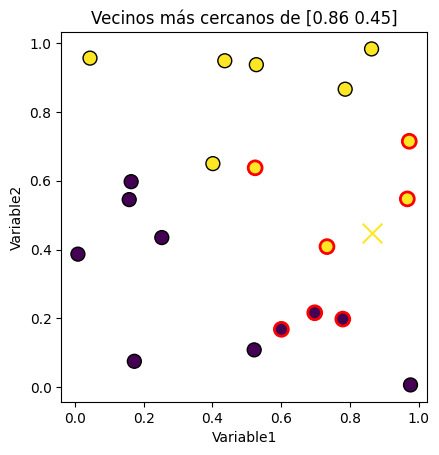

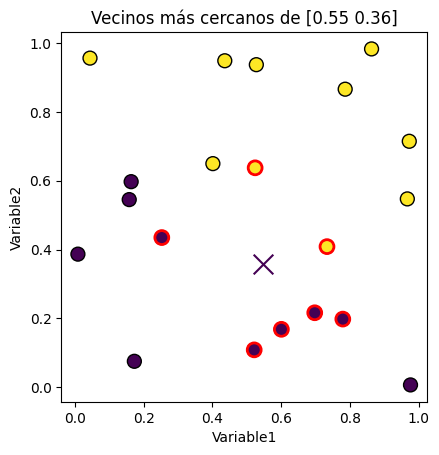

,0,1,pred_class
0,0.017490,0.891573,1
1,0.284861,0.298976,0
2,0.792034,0.324471,0
3,0.864710,0.447513,1
4,0.548230,0.357172,0


In [32]:
# We will assume that the closest neighbors will be more similar to the example we want to classify than further ones.

#First we load the data:

#training data

df = pd.read_csv('datos/datos01_train.csv')


# We separate variables(x) from labels (y)
X = df[['Variable1', 'Variable2']]
y = df['Clase']

#test data
 
df_test = pd.read_csv('datos/datos01_test.csv')

# We separate variables(x) from labels (y)
X_test = df_test[['Variable1', 'Variable2']]

#Now we compute the likeness between the new example and the existing data
plt.figure(figsize=(5, 5))

# We paint the trainig set first.
plt.scatter(df['Variable1'], 
            df['Variable2'], 
            c=df['Clase'], 
            s=100, 
            label='Training')

# Now we paint the validation test
plt.scatter(df_test['Variable1'], 
            df_test['Variable2'], 
            color='red', 
            marker='x', # we make them appear as crosses instead of points to enhance differentitation
            s=150, 
            label='Test')

plt.title('datos01_train + datos01_test', family='monospace')
plt.xlabel('Variable1') 
plt.ylabel('Variable2') 

# Incluir leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


#APPLYING K=3 NEAREST NEIGHBORS.-> WE DONT NEED TO SPECIFY THAT K=3 BECAUSE ITS SET AS A DEFAULT VALUE.
resultados_k3 = aplicar_kNN_datos_nuevos(X_test.values, X.values, y.values) #We apply the algorithm to the validation data.
resultados_k3

#APPLYING =7 NEAREST NEIGHBORS. 
resultados_k7= aplicar_kNN_datos_nuevos(X_test.values, X.values, y.values,7) #We apply the algorithm to the validation data.
resultados_k7

### Using Sklearn


In [33]:
from sklearn.neighbors import KNeighborsClassifier

# We instantiate a new KNeighborsClassifier object that will represent our model
modelo = KNeighborsClassifier(n_neighbors=3)
# then , we adjust the model to the training data 
modelo.fit(X, y)

#Now , we can say our model has been trained. It's time for testing.
# We do that by making our model classify unknown data 
modelo.predict(X_test)

#in case we would like to see the probabilty each element has to belong to one class or another..
#modelo.predict_proba(X_test)


#results are given inside an array of vectors.

#IN ORDER TO SEE WHICH PARAMETERS ARE BEING USED TO TRAIN THE MODEL: 
#modelo.get_params()
"""
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
  'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2, 
 'weights': 'uniform'}
"""


"\n{'algorithm': 'auto',\n 'leaf_size': 30,\n 'metric': 'minkowski',\n  'metric_params': None,\n 'n_jobs': None,\n 'n_neighbors': 3,\n 'p': 2, \n 'weights': 'uniform'}\n"

### Validation
Now that we have fit our model to the data , we need to measure how good it is. For that, we will take a file where test data has been  classified already, so we can compare our model's results to the actual class those data should have be given. 

In [34]:
y_test = pd.read_csv('datos/datos01_test_etiquetas.csv')
#print(y_test.values)
y_test = y_test.values.ravel()
y_test

array([0, 0, 1, 1, 0], dtype=int64)

In [35]:
#Make our model guess the class each data belongs to.
y_pred = modelo.predict(X_test)
y_pred


array([0., 0., 0., 1., 0.])

we notice that the model fails classifying the fourth element (I=3)

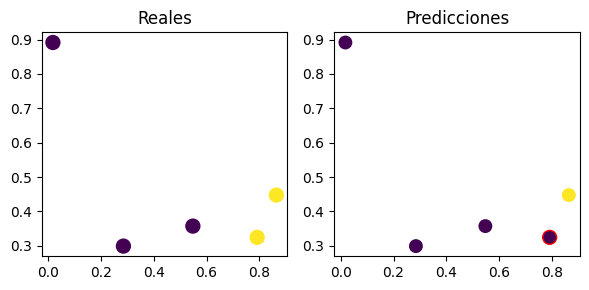

In [36]:
# To display two different plots inside the same figure.
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# real class plot
axes[0].scatter(df_test['Variable1'], 
                df_test['Variable2'], 
                c=y_test, 
                s=100)
axes[0].set_title('Reales')

# class prediction plot

ec = np.array(['none'] * len(df_test)) 
 
ec[y_test != y_pred] = 'r' #surround by a red line each example that has not been predicted corrrectly
# paint predictions inside their
axes[1].scatter(df_test['Variable1'], 
                df_test['Variable2'], 
                c=y_pred, 
                s=100, 
                edgecolors=ec)
axes[1].set_title('Predicciones')

plt.tight_layout()
plt.show()

# Model's goodness-of-fit
In order to check how well does our model classify new data, we will use the confussion matrix.

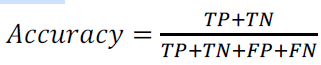

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

# To evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Matriz de confusión:\n', conf_matrix)

Accuracy: 0.80
Matriz de confusión:
 [[3 0]
 [1 1]]


### Exercise
Using datos02... train a model and visualize the results. Compute accuracy's value using the corresponding test data (and their corresponding labels).
After, train another model using Manhattan distance as a metric.

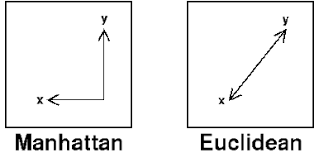

In [38]:
# We will assume that the closest neighbors will be more similar to the example we want to classify than further ones.

#First we load the data:

#training data

df = pd.read_csv('datos/datos02_train.csv')


# We separate variables(x) from labels (y)
X = df[['Variable1', 'Variable2']]
y = df['Clase']

#test data
 
df_test = pd.read_csv('datos/datos02_test.csv')

# We separate variables(x) from labels (y)
X_test = df_test[['Variable1', 'Variable2']]


#USING DATASET 02
 #We instantiate a new KNeighborsClassifier object that will represent our model
model = KNeighborsClassifier(n_neighbors=3)
# then , we adjust the model to the training data 
model.fit(X, y)

#Now , we can say our model has been trained. It's time for testing.
# We do that by making our model classify unknown data 
y_classification_results=model.predict(X_test)
y_actual_labels=pd.read_csv('datos/datos02_test_etiquetas.csv')
accuracy=accuracy_score(y_classification_results,y_actual_labels);
confmatrix=confusion_matrix(y_classification_results,y_actual_labels);
print("Results for the euclidean distance metric:")
print(accuracy);
print( confmatrix);

#USING MANHATTAN DISTANCE 
manhattan_model=KNeighborsClassifier(n_neighbors=3,metric='manhattan')
manhattan_model.fit(X,y)


#Now , we can say our model has been trained. It's time for testing.
# We do that by making our model classify unknown data 
y_manhattan_classification_results=manhattan_model.predict(X_test)
 
accuracy_mnh=accuracy_score(y_manhattan_classification_results,y_actual_labels);
confmatrix_mnh=confusion_matrix(y_manhattan_classification_results,y_actual_labels);

print("Results for the manhattan distance metric:")
print(accuracy_mnh);
print(confmatrix_mnh);


Results for the euclidean distance metric:
1.0
[[3 0]
 [0 2]]
Results for the manhattan distance metric:
0.8
[[2 0]
 [1 2]]


Results indicate that manhattan distance is less accurate as a metric for this problem. It makes sense , since euclidean distance gives us the SHORTEST distance between two points, while manhattan does not. That means that some of the neighbors was identified as less similar ( further) when it was actually closer, and therefore , other, actually further and less similar neighbor was used.

## APPLYING KNN TO MULTIVARIATE DATA.

In [39]:
df_train = pd.read_csv('datos/datos03_train.csv')
df_train.info()

df_train.describe()# WILL SHOW DEATILED INFO-> NUMERIC VARIABLES ONLY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x.1     1600 non-null   float64
 1   x.2     1600 non-null   float64
 2   x.3     1600 non-null   float64
 3   x.4     1600 non-null   float64
 4   Clase   1600 non-null   object 
dtypes: float64(4), object(1)
memory usage: 62.6+ KB


,x.1,x.2,x.3,x.4
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.008112,-0.017286,-0.024780,-0.003261
std,0.578455,0.576607,0.569985,0.572191
min,-0.999401,-0.999467,-0.999575,-0.997903
25%,-0.458114,-0.522156,-0.514393,-0.485499
50%,-0.004972,-0.022612,-0.045641,-0.017759
75%,0.512347,0.463921,0.452209,0.482743
max,0.999711,0.999206,0.997743,0.999351


### To observe data distribution we will use seaborn

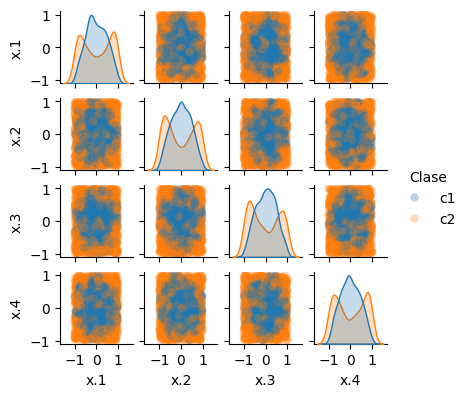

In [42]:
import seaborn as sns

df_train['Clase'] = pd.Categorical(df_train['Clase'], categories=['c1', 'c2']) # Transform Object data into the specified Categorical variables

sns.pairplot(df_train, # dataset
            hue='Clase', #  variable we want coloured. In this case, the variables.
            height=1,  
            aspect=1,  #Graph proportions. (squared)
            plot_kws={ # aesthetic parameters
                'alpha':0.3, # transparency
                'edgecolor': 'none' # remove edges from each point.
            })

plt.show()

In [44]:
#We define the model
X_train = df_train.drop('Clase', axis = 1)
y_train = df_train['Clase'].values.ravel()
#then  proceed to train  it
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)

# Laod the TEST dataset.
df_test = pd.read_csv('datos/datos03_test.csv')
X_test = df_test.drop('Clase', axis = 1)
y_test = df_test[['Clase']].values.ravel()
#Since this is supervised learning, we will have access to the real class each data should've been classified as.

#### To observe data distribution after training

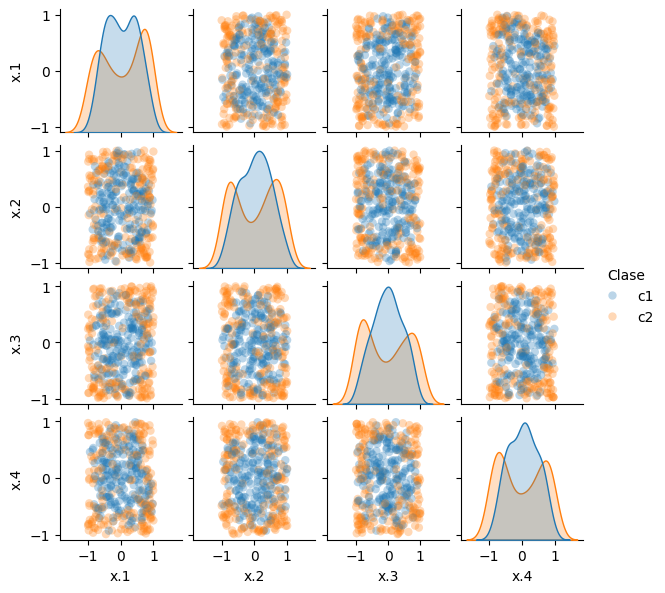

In [45]:
df_test['Clase'] = pd.Categorical(df_test['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_test, hue='Clase', height=1.5, aspect=1, 
            plot_kws={'alpha':0.3, 'edgecolor': 'none'})
#plt.show()

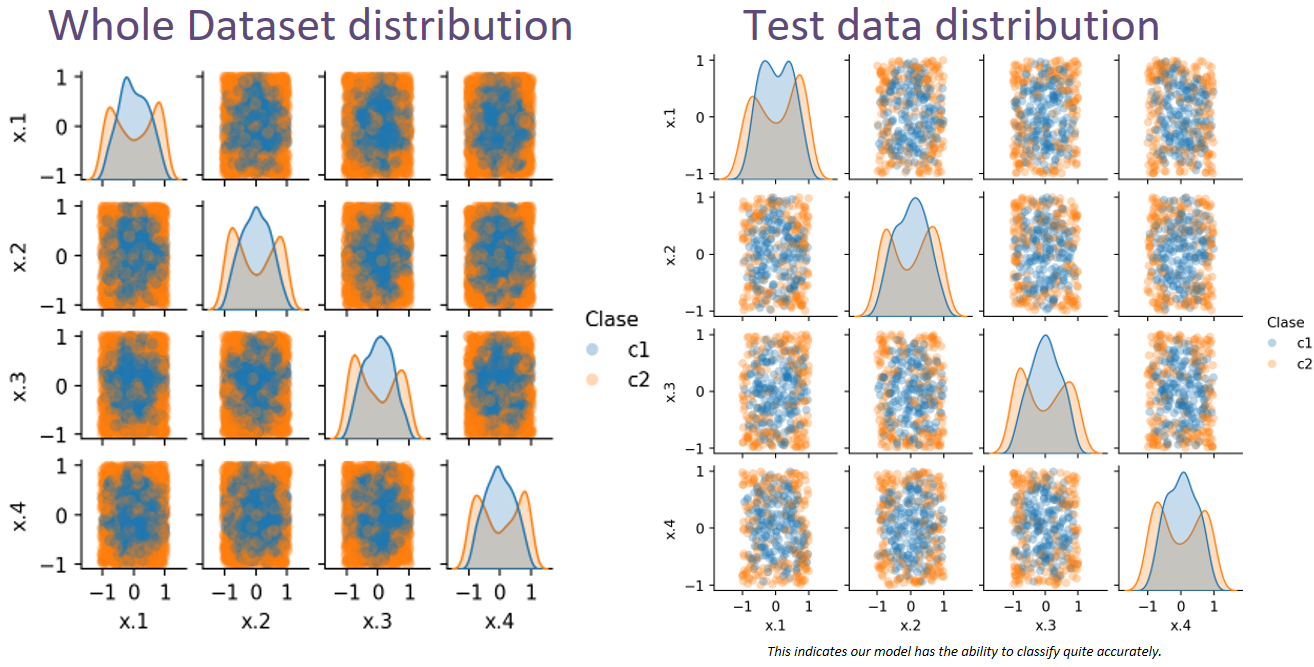


##### Classification and model evaluation

In [46]:
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confussion matrix:\n', conf_matrix)

Accuracy: 0.90
Confussion matrix:
 [[190  13]
 [ 29 168]]


## UTILITY METHOD TO TRAIN AND EVALUATE A MODEL:


In [47]:
def train_and_get_accuracy(X_train, y_train, X_test, y_test, k=3):
    model  = KNeighborsClassifier(n_neighbors=k)
    model .fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print('Confussion matrix:\n', conf_matrix)
    return modelo, y_pred #Returns the model and the set of classes the model has assigned each example.

#model, y_pred = train_and_get_accuracy(X_train, y_train, X_test, y_test)

# Noise Sensitivity